

#  <center>Linear Regression - Mobile Price Prediction (Problem)</center> #

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)<br>

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>
  - **5.2** [**Post-Profiling Report**](#Section52)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Feature Extraction**](#Section71)<br>
  - **7.2** [**Feature Transformation**](#Section72)<br>
  - **7.3** [**Feature Scaling**](#Section73)<br>
  - **7.4** [**Data Preparation**](#Section74)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>


---
<a name = Section1></a>
# **1. Introduction**
---

- **Linear Regression** is a machine learning algorithm based on supervised learning.

- It is mostly used for finding out the **relationship** between **features** and **forecasting (or target) variable**.

- This regression technique finds out a **linear relationship** between x (input) and y (output). Hence, the name is Linear Regression.

<center><img src="https://dphi.tech/blog/wp-content/uploads/2020/04/example-regression-simulation.gif" width=50%></center>


- Linear regression can be denoted by the equation: 
<center><h4>$y$= $b0$ + $b1$ * $X$</h4></center>

- So if **salary** is a **linearly dependent** on number of **years of experience**, we can **predict someone's salary** using the equation:

<center><h4>$salary$= $b0$ + $b1$ * $years\_of\_experience$</h4></center>

---
<a name = Section2></a>
# **2. Problem Statement**


- Renowned mobile company facing huge competion in the exisiting mobile product categories 

- They wanted to conquer the competiton by re catrgorization of the some of the products.

- As a data scientist we have to analyze **Mobile Price** basis the **Mobile Features** so that competitive prodcut can be launched with the **Best Price**

- Objective is to find which features have more impact on mobile price and provide information on it.

- Additionally, you have to **train** a **regression** model to **predict Mobile Price** and **check the accuracy** of your **model's predictions**.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
# !pip install -q datascience                                                       # Package that is required by pandas profiling
# !pip install -q pandas-profiling  

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.



In [2]:
# !pip install -q --upgrade pandas-profiling


### 3.3 Importing Libraries

In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                               # Importing for panel data analysis
#from pandas_profiling import ProfileReport                                        # Import Pandas Profiling (To generate Univariate Analysis) 
#pd.set_option('display.max_columns', None)                                        # Unfolding hidden features if the cardinality is high      
#pd.set_option('display.max_colwidth', None)                                       # Unfolding the max feature width for better clearity      
#pd.set_option('display.max_rows', None)                                           # Unfolding hidden data points if the cardinality is high
#pd.set_option('display.float_format', lambda x: '%.5f' % x)                       # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                                # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                                   # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                                             # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                              # To split the data in training and testing part 
from sklearn.preprocessing import StandardScaler                                  # Importing Standard Scaler library from preprocessing.                             
from sklearn.linear_model import LinearRegression                                 # Importing Linear Regression model
from sklearn.metrics import mean_squared_error                                    # To calculate the MSE of a regression model
from sklearn.metrics import mean_absolute_error                                   # To calculate the MAE of a regression model
from sklearn.metrics import r2_score                                              # To calculate the R-squared score of a regression model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                                   # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")     


### 4. Data Acquisition & Description


In [4]:
import os

In [5]:
os.getcwd()

'C:\\Users\\Hemant Kshirsagar\\Machine Learning'

In [6]:
os.chdir('C:/Users/Hemant Kshirsagar/Downloads')

In [7]:
# importing data and checking the shape and head
mob_price = pd.read_csv("Cellphone.csv")
print('Data Shape:', mob_price.shape)
mob_price.head()

Data Shape: (161, 14)


,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **description** and **statistics** about the data.

In [8]:
mob_price.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [9]:

mob_price.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

<a name = Section42></a>
### **4.2 Data Information**

 - In this section, we will get **information about the data** and see some observations.


In [10]:
mob_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


- We will be dropping Product_id column as its not necessary 

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

In [11]:
mob_price.drop('Product_id', axis =1, inplace = True)

In [12]:
#Checking the data again
mob_price.head()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [13]:
# Checked for the duplicated. There are no duplicated values in dataset
mob_price.duplicated().sum()

0

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

####  What is the distribution of the target feature

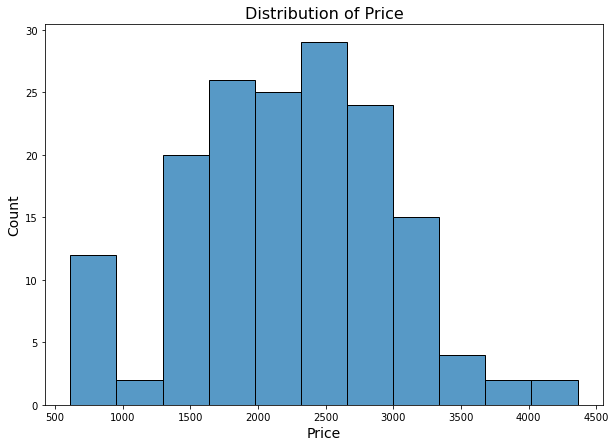

In [14]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize = [10,7])

# Plotting the hist plot using the seaborn
sns.histplot(mob_price['Price'])

# Set x, y labels of size 14, ticks of size 12 and title label of size 16.
plt.xlabel(xlabel ='Price', size = 14)
plt.ylabel(ylabel = 'Count', size = 14)
plt.title(label='Distribution of Price', size =16)

plt.show()

#### What is the Sales Volume Vs Price distribution

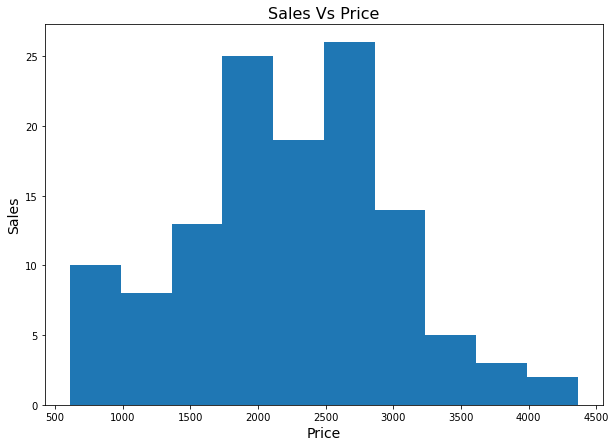

In [15]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize = [10,7])

# Plot a histogram on Sales no's with respectto Price 
mob_price.groupby(by = 'Sale')['Price'].mean().plot.hist()

# Set x, y labels of size 14, ticks of size 12 and title label of size 16.
plt.xlabel(xlabel ='Price', size = 14)
plt.ylabel(ylabel = 'Sales', size=14)
plt.title(label='Sales Vs Price', size =16)
plt.show()

#### What is the sigificance of battery in the mobile price

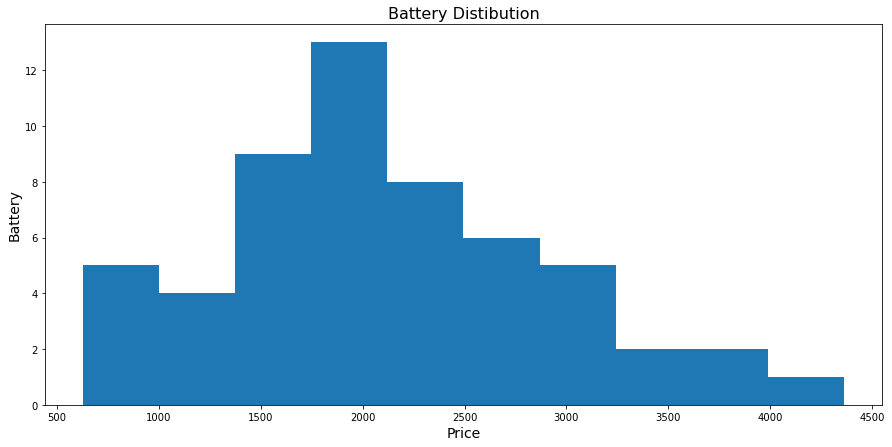

In [16]:
figure = plt.figure(figsize = [15,7])

# Plot a histogram on Batery no's with respectto Price 
mob_price.groupby(by = 'battery')['Price'].mean().plot.hist()

# Set x, y labels of size 14, ticks of size 12 and title label of size 16.
plt.xlabel(xlabel ='Price', size = 14)
plt.ylabel(ylabel = 'Battery', size=14)
plt.title(label='Battery Distibution', size =16)

plt.show()

#### How Camera Megapixel can affect the Mobile Price

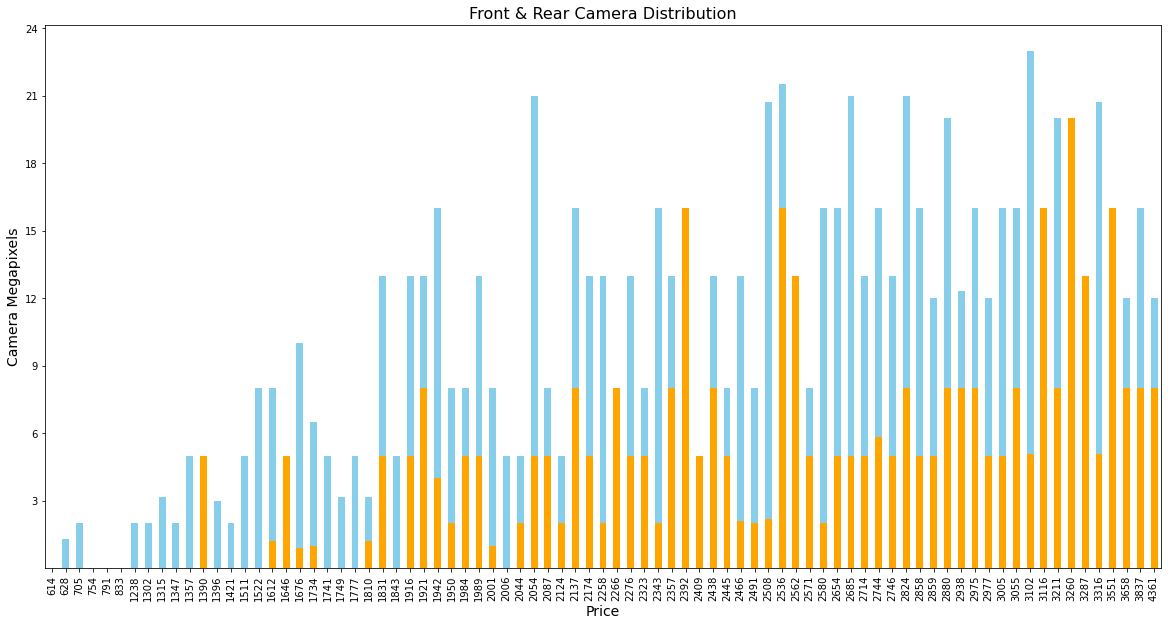

In [17]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize = [20,10])

# Plot a Bargraph on how camera can influence price
mob_price.groupby(by = 'Price')['RearCam'].mean().plot.bar(color = 'SkyBlue')
mob_price.groupby(by = 'Price')['Front_Cam'].mean().plot.bar(color = 'Orange')

# Set x, y labels of size 14, ticks of size 12 and title label of size 16
plt.xlabel(xlabel ='Price', size = 14)
plt.ylabel(ylabel = 'Camera Megapixels', size=14)
plt.yticks(ticks= np.arange(3,26,3))
plt.title(label='Front & Rear Camera Distribution', size =16)


plt.show()


#### How Weight & Thickness affecting the Mobile Price

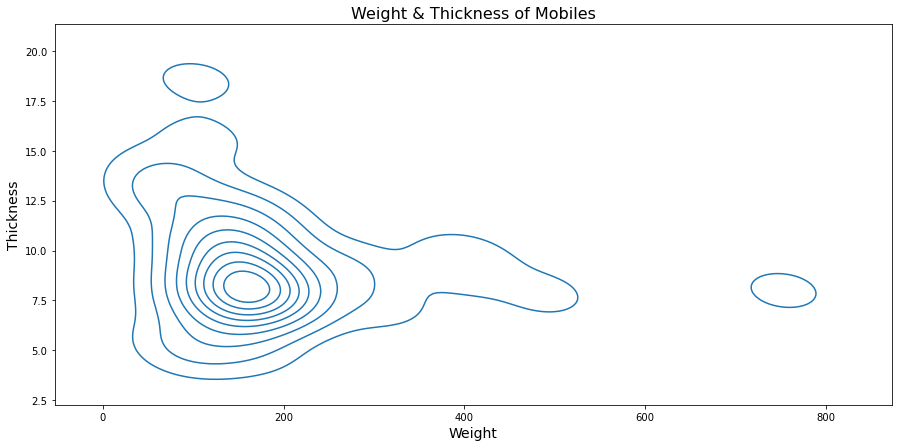

In [18]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize = [15,7])

# Plot a kde on Mobile Weight & Thickness
sns.kdeplot(data=mob_price,x='weight', y='thickness')

# Set x, y labels of size 14, ticks of size 12 and title label of size 16
plt.xlabel(xlabel ='Weight', size = 14)
plt.ylabel(ylabel = 'Thickness', size=14)
plt.title(label='Weight & Thickness of Mobiles', size =16)

plt.show()

#### What is the relationship of Mobile Price with ROM & RAM

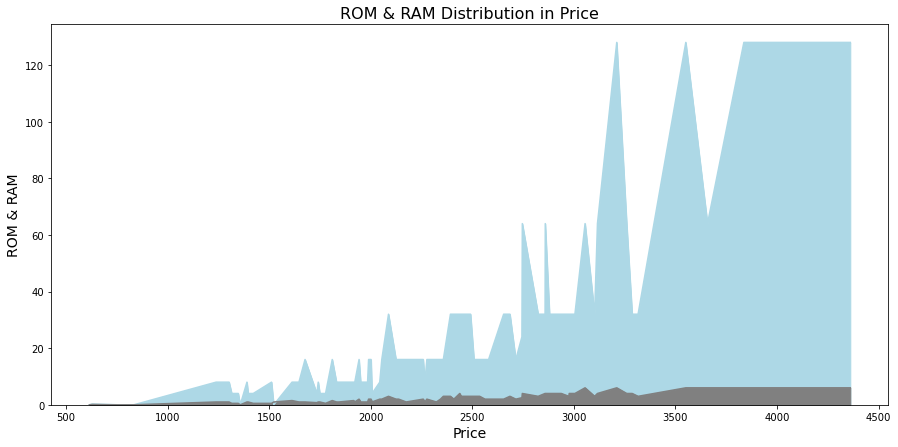

In [19]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize = [15,7])

# Plot a Area graph explaining the relationship between price with ROM & RAM
mob_price.groupby(by = 'Price')['internal mem'].mean().plot.area(color ='Lightblue')
mob_price.groupby(by = 'Price')['ram'].mean().plot.area(color ='Grey')

# Set x, y labels of size 14, ticks of size 12 and title label of size 16
plt.xlabel(xlabel ='Price', size = 14)
plt.ylabel(ylabel = 'ROM & RAM', size=14)
plt.title(label='ROM & RAM Distribution in Price', size =16)

plt.show()

#### What is the Screen Rosolution distribution in Mobile Price 

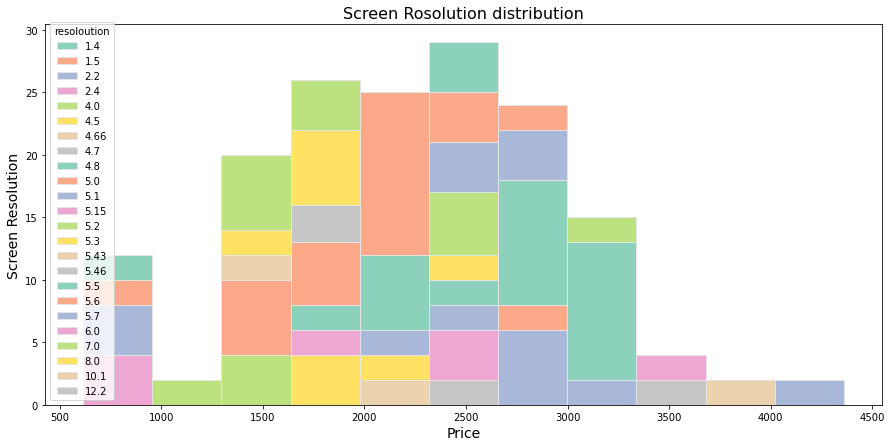

In [20]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize = [15,7])

# Plotting histplot to check the distribution of Screen Resolution
sns.histplot(mob_price,x="Price", hue="resoloution", multiple="stack", palette="Set2", edgecolor=".9",linewidth=.9)

# Set x, y labels of size 14, ticks of size 12 and title label of size 16
plt.xlabel(xlabel ='Price', size = 14)
plt.ylabel(ylabel = 'Screen Resolution', size=14)
plt.title(label='Screen Rosolution distribution', size =16)

plt.show()

<AxesSubplot:>

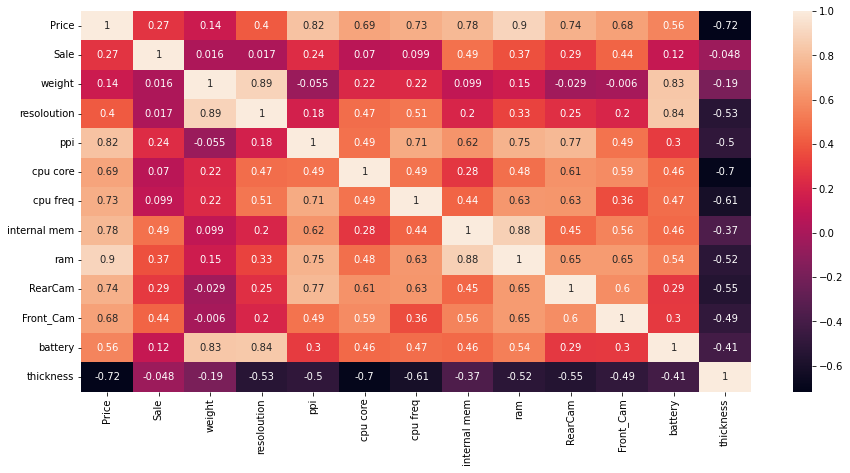

In [21]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# plotting heatmap to check the correlation between features
sns.heatmap(mob_price.corr(),annot=True, cmap='rocket')


###  Lets create two dataframes for dependent and independent features.


In [22]:
X = mob_price.drop('Price', axis =1)
X.head()

,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [23]:
y = mob_price.Price
y.head()

0    2357
1    1749
2    1916
3    1315
4    1749
Name: Price, dtype: int64

In [24]:
feature_cols = (['Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'])

### Now we will split our data in training and testing part for further development.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (128, 12)
y_train shape: (128,)
X_test shape: (33, 12)
y_test shape: (33,)


### Lets scale the features of dataframe using a standard scaler

In [26]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)

X_test_sc = sc.transform(X_test)


### Model Development & Evaluation

In [27]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [28]:
print ('Intercept:',linreg.intercept_)
print ('Coefficients:',linreg.coef_)

Intercept: 1797.2504483740763
Coefficients: [-2.22907579e-02 -4.11411359e-01 -6.58564767e+01  1.11925278e+00
  4.81630797e+01  1.04739247e+02  6.84860702e+00  8.14175383e+01
  4.32982535e+00  9.37505015e+00  1.20698298e-01 -7.84837454e+01]


In [29]:
feature_cols.insert(0, 'Intercept')
feature_cols

['Intercept',
 'Sale',
 'weight',
 'resoloution',
 'ppi',
 'cpu core',
 'cpu freq',
 'internal mem',
 'ram',
 'RearCam',
 'Front_Cam',
 'battery',
 'thickness']

In [30]:
coef = linreg.coef_.tolist()
coef

[-0.02229075793081834,
 -0.41141135948520124,
 -65.85647668776592,
 1.1192527795738079,
 48.16307966466641,
 104.73924689187594,
 6.848607020976986,
 81.41753832540292,
 4.32982534702848,
 9.37505014529196,
 0.12069829757198007,
 -78.48374537564834]

In [31]:
coef.insert(0, linreg.intercept_)
coef

[1797.2504483740763,
 -0.02229075793081834,
 -0.41141135948520124,
 -65.85647668776592,
 1.1192527795738079,
 48.16307966466641,
 104.73924689187594,
 6.848607020976986,
 81.41753832540292,
 4.32982534702848,
 9.37505014529196,
 0.12069829757198007,
 -78.48374537564834]

In [32]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 1797.2504483740763
Sale -0.02229075793081834
weight -0.41141135948520124
resoloution -65.85647668776592
ppi 1.1192527795738079
cpu core 48.16307966466641
cpu freq 104.73924689187594
internal mem 6.848607020976986
ram 81.41753832540292
RearCam 4.32982534702848
Front_Cam 9.37505014529196
battery 0.12069829757198007
thickness -78.48374537564834


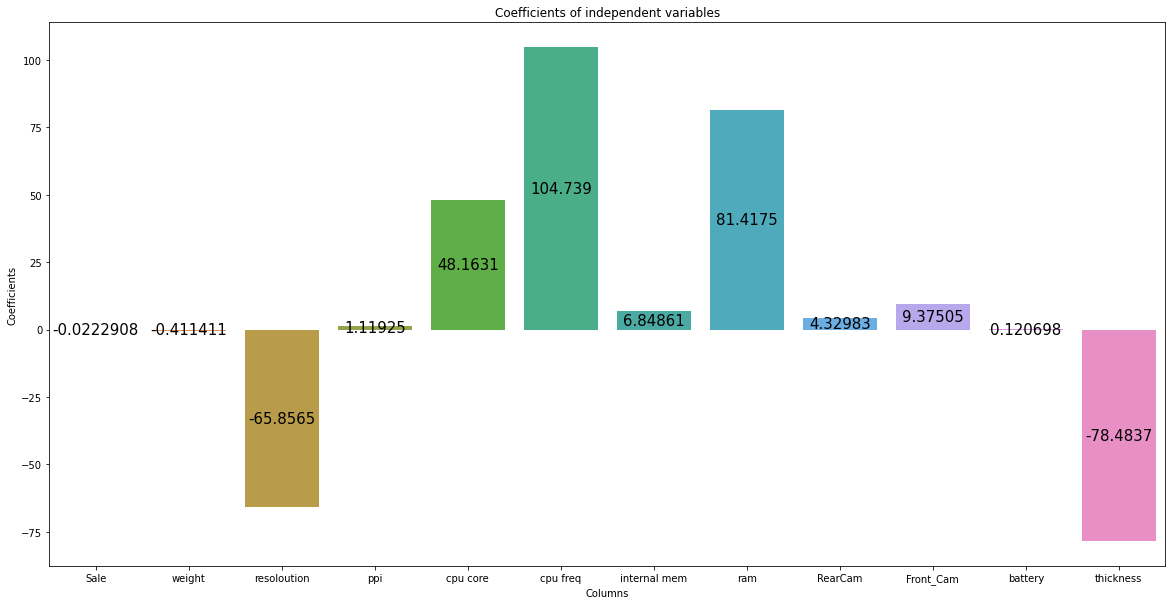

In [33]:
column_names = X.columns
column_coef = pd.DataFrame({"columns" : column_names,
             "coef_": linreg.coef_ })

plt.figure(figsize = (20,10))

viz = sns.barplot(data = column_coef, x = "columns", y = "coef_")

plt.bar_label(viz.containers[0],size=15,label_type="center")

plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel("Columns",size = 10)
plt.ylabel("Coefficients",size = 10)
plt.title("Coefficients of independent variables")
plt.show()



In [34]:
y_pred_train = linreg.predict(X_train)

In [35]:
y_pred_test = linreg.predict(X_test)

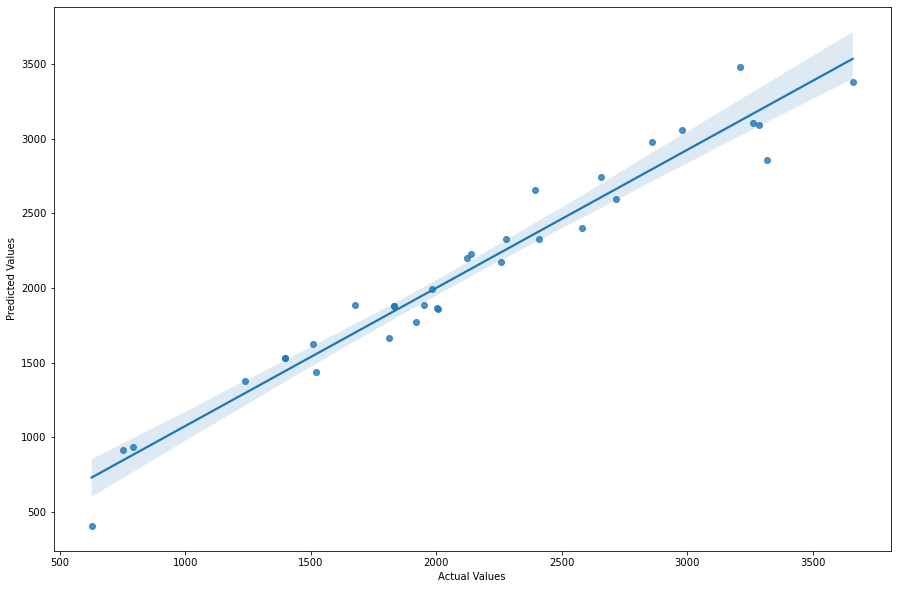

In [36]:
figure = plt.figure(figsize =[15, 10])
sns.regplot(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [37]:
from sklearn import metrics

In [38]:
#Computing the MAE for our Sales predictions
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [39]:
print ('Mae for the training is {}'.format(MAE_train))
print ('Mae for the test is {}'.format(MAE_test))

Mae for the training is 136.11983095593305
Mae for the test is 142.33353538715346


In [40]:
# Computing the MSE for our Sales predictions
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [41]:
print ('MSE for the training is{}'.format(MSE_train))
print ('MSE for the test is{}'.format(MSE_test))

MSE for the training is27192.36926698868
MSE for the test is27575.599815168986


In [42]:
# Computing the RMSE for our Sales predictions
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt( metrics.mean_squared_error(y_test, y_pred_test))

In [43]:
print('RMSE for the training is {}'.format(RMSE_train))
print('RMSE for the test is {}'.format(RMSE_test))

RMSE for the training is 164.90108934445726
RMSE for the test is 166.05902509399778


### Model Evaluation using R-squared and Adjusted R-squared value

In [44]:
r2_train = metrics.r2_score(y_train, y_pred_train)
r2_test = metrics.r2_score(y_test, y_pred_test)

print ('R2 score for training is {}'.format(r2_train))
print ('R2 score for test is {}'.format(r2_test))

R2 score for training is 0.9536945242083958
R2 score for test is 0.9520086347128638


In [45]:
adj_r2_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('Adjusted R2 for training is {}'.format(adj_r2_train))
print('Adjusted R2 for test is {}'.format(adj_r2_test))

Adjusted R2 for training is 0.9488626484736198
Adjusted R2 for test is 0.923213815540582


### Conclusion

- We have analyzed and understood the different features that can influence price of the mobile.

- PPI, CPU Core, CPU Freq, Internal Memory, Rear_Cam & Front Cam is an important role in determining the price of the mobile.

- We have also built a predictor to estimate the mobile price based on those influential features.

- The model performs decently as shown by our evaluation metrics.

- This can help the mobile company to predict best price and cut the competition.

- Since the data is less, getting more records can improve the model's performance.



### Creating model using Decision Tree Regressor.

In [46]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)

In [47]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [48]:
y_dtr_pred_train = dtr.predict(X_train)
y_dtr_pred_test = dtr.predict(X_test)

### To improve score lets use GridSearchCV

In [50]:
hp= {
    "criterion" : ["squared_error"],
    "max_depth" : [None],
    "splitter"  : ["best"]
}
    

In [51]:
from sklearn.model_selection import GridSearchCV
Grid2 = GridSearchCV(dtr, param_grid=hp, cv=10, n_jobs=-1, verbose=True)

In [52]:
Grid2.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error'], 'max_depth': [None],
                         'splitter': ['best']},
             verbose=True)

In [53]:
y_pred_train_grid2 = Grid2.predict(X_train)
y_pred_test_grid2 = Grid2.predict(X_test)

In [57]:
R2_Grid_Train = metrics.r2_score(y_train, y_pred_train_grid2)
R2_Grid_Test = metrics.r2_score(y_test, y_pred_test_grid2)
print ('Adjusted R2 for training is {}'.format(R2_Grid_Train))
print ('Adjusted R2 for test is {}'.format(R2_Grid_Test))

Adjusted R2 for training is 1.0
Adjusted R2 for test is 0.9779224744807851


In [58]:
adjr2_Grid_train = 1 - (1-R2_Grid_Train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adjr2_Grid_test = 1- (1-R2_Grid_Test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('AdjR2 score for the training is {}'. format(adjr2_Grid_train))
print('AdjR2 score for the test is {}'. format (adjr2_Grid_test))

AdjR2 score for the training is 1.0
AdjR2 score for the test is 0.9646759591692561


### Creating model using Random Forest Regressor.

In [60]:
from sklearn.ensemble import RandomForestRegressor
rfc= RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None)
rfc

RandomForestRegressor()

In [61]:
rfc.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
y_rfc_pred_train = rfc.predict(X_train)
y_rfc_pred_test = rfc.predict(X_test)

In [63]:

# Computing the RMSE for our Sales predictions
Train_rfc = np.sqrt( metrics.mean_squared_error(y_train, y_rfc_pred_train))
Test_rfc = np.sqrt( metrics.mean_squared_error(y_test, y_rfc_pred_test))

print('RMSE for the training is {}'.format(Train_rfc))
print('RMSE for the test is {}'.format(Test_rfc))

RMSE for the training is 61.323190619964485
RMSE for the test is 114.91487004550696


In [64]:
Train_R2_rfc = metrics.r2_score(y_train, y_rfc_pred_train)
Test_R2_rfc = metrics.r2_score(y_test, y_rfc_pred_test)

print('R2 for the training is {}'. format(Train_R2_rfc))
print('R2 for the test is {}'. format(Test_R2_rfc))

R2 for the training is 0.9935962438263142
R2 for the test is 0.9770178530172337


In [65]:
Train_ADJR2_rfc = 1 - (1-Train_R2_rfc)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Test_ADJR2_rfc = 1- (1-Test_R2_rfc)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('AdjR2 for the training is {}'. format(Train_ADJR2_rfc))
print('AdjR2 for the test is {}'. format(Test_ADJR2_rfc))

AdjR2 for the training is 0.9929280257907991
AdjR2 for the test is 0.9632285648275738


## Conclusion

#### By using Descion Tree Regressor we are getting below scores:

- RMSE for the training is 0.0
- RMSE for the test is 114.97377830170537

- R2 score for the training is 1.0
- R2 score for the test is 0.9769942845233095

- AdjR2 score for the training is 1.0
- AdjR2 score for the test is 0.9631908552372952


#### By using Random Forest Regressor we are getting below scores:

- RMSE for the training is 61.88997763799282
- RMSE for the test is 121.1840081208838

- R2 for the training is 0.9935773217943683
- R2 for the test is 0.9701418883846334

- AdjR2 for the training is 0.9929966945033458
- AdjR2 for the test is 0.96322070214154135



**By Decision Tree Regressor method we have noticed R2 & AdjR2 score for the training is 1,  and test score difference less than 5% hence we are not facing any issue of over fillitng here**

**By Random Forest Regressor Method R2 & AdjR2 score for the training & test score difference less than 5% hence we are not facing any issue of over fillitng here**
